In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow 
from tensorflow import keras
from keras import models,layers,optimizers

In [2]:
train_dir = r'D:\Datasets\Face Mask Detection\train'
validation_dir = r'D:\Datasets\Face Mask Detection\valid'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
        )
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (256,256),
        batch_size = 32,
        class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        batch_size = 32,
        target_size = (256,256),
        class_mode = 'binary'
)

Found 16000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
model = models.Sequential()
    
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

    
    
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['acc'])

In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 800,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/10
800/800 [==============================] - 2300s 3s/step - loss: 0.3350 - acc: 0.9046 - val_loss: 0.0037 - val_acc: 0.9994
Epoch 2/10
800/800 [==============================] - 2501s 3s/step - loss: 0.0350 - acc: 0.9887 - val_loss: 3.0697e-04 - val_acc: 1.0000
Epoch 3/10
800/800 [==============================] - 2206s 3s/step - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0023 - val_acc: 0.9994
Epoch 4/10
800/800 [==============================] - 3459s 4s/step - loss: 0.0110 - acc: 0.9970 - val_loss: 0.0204 - val_acc: 0.9962
Epoch 5/10
800/800 [==============================] - 2227s 3s/step - loss: 0.0062 - acc: 0.9981 - val_loss: 0.0067 - val_acc: 0.9981
Epoch 6/10
800/800 [==============================] - 2966s 4s/step - loss: 0.0961 - acc: 0.9751 - val_loss: 5.9501e-05 - val_acc: 1.0000
Epoch 7/10
800/800 [==============================] - 3214s 4s/step - loss: 0.0093 - acc: 0.9971 - val_loss: 4.2953e-05 - val_acc: 1.0000
Epoch 8/10
800/800 [==============================

<function matplotlib.pyplot.show(close=None, block=None)>

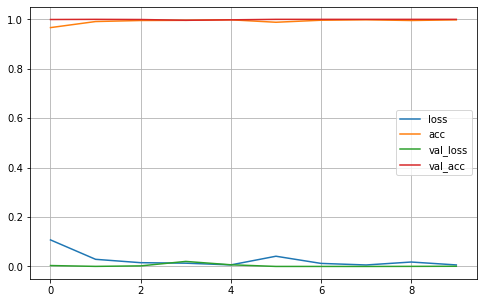

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show

In [19]:
model.save("Face Mask Detection.h5")